## Text Preprocessing

***

In [1]:
# Initialize NLTK
# import nltk
# nltk.download('popular')

In [2]:
#nltk.__version__

In [3]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from collections import OrderedDict
from ast import literal_eval

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk.probability import FreqDist
from nltk.util import bigrams, ngrams, trigrams

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
%matplotlib inline

In [4]:
df = pd.read_csv('blogdata.csv')

In [5]:
df

,words
0,"We have given our hearts away, a sordid boon !”"
1,1. Start it on the side
2,"Sugar’s sweet, so is she,"
3,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award."
4,Nicholas’ brain runs on and is excellent at processing data and concrete facts. He works best with things he can quantify. He runs into an almost insurmountable challenge in trying to rationalize the existence of his exceptional infant daughter and what she represents. He isn’t without a sense of humor and is very loving but he is forced to radically confront his limitations.
...,...
9995,Perfect timing for Friday Fragments! I have a jumble of things to unload. For more jumbled thoughts from other fabulous bloggers go visit Mrs. 4444s.
9996,"Herbert paid his debt to society by twiddling away the days in solitary confinement. Herbert’s personally prohibited him from becoming familiar with the inmates he was stranded with. Being friends with anyone wasn’t an option. It became a well-know fact that he couldn’t get along with others, especially in confined places. Whenever he was in the general population, he pursued fights on a daily basis. Arguments were his passion and ”asshole” soon became his middle name. Not even the meanest of the mean would mess with Herbert. The years put a definition of anger in the creases of his drawn face. The look of a psychopath was naturally etched into his smile. Inmates made it a point to stay away from Herbert whenever he wasn’t being kept in solitude. However, when he was alone, away from all other prisoners, Herbert was the perfect inmate. The guards had no problems with him. They came to the understanding that Herbert caused fight in order to stay out of general population. “Clooney, ..."
9997,20. A Warning From The Sun
9998,"Sherry and John from Young House Love are teaming up with Katie from Bower Power to host their winter edition of The Pinterest Challenge to get people to stop pinning and start doing. (Not affiliated with the Pinterest company.) The rules? You just find something from Pinterest that inspires you and create your own version. Then join Young House Love for a big Pinterest Challenge linky party on Wednesday, March 14th. Sounds fun, right? I'm joining the challenge with my sofa table makeover."


In [6]:
df.shape

(10000, 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [8]:
df.describe()

,words
count,10000
unique,10000
top,tie dye
freq,1


In [9]:
len(df.words)

10000

### Tokenization

In [10]:
df['tokenized'] = df['words'].apply(word_tokenize)

In [11]:
df.head()

,words,tokenized
0,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]"
1,1. Start it on the side,"[1, ., Start, it, on, the, side]"
2,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]"
3,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]"
4,Nicholas’ brain runs on and is excellent at processing data and concrete facts. He works best with things he can quantify. He runs into an almost insurmountable challenge in trying to rationalize the existence of his exceptional infant daughter and what she represents. He isn’t without a sense of humor and is very loving but he is forced to radically confront his limitations.,"[Nicholas, ’, brain, runs, on, and, is, excellent, at, processing, data, and, concrete, facts, ., He, works, best, with, things, he, can, quantify, ., He, runs, into, an, almost, insurmountable, challenge, in, trying, to, rationalize, the, existence, of, his, exceptional, infant, daughter, and, what, she, represents, ., He, isn, ’, t, without, a, sense, of, humor, and, is, very, loving, but, he, is, forced, to, radically, confront, his, limitations, .]"


### Removing Punctuations

In [12]:
punc = string.punctuation

In [13]:
df['no_punc'] = df['tokenized'].apply(lambda x: [word for word in x if word not in punc])

In [14]:
df.head()

,words,tokenized,no_punc
0,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[We, have, given, our, hearts, away, a, sordid, boon, ”]"
1,1. Start it on the side,"[1, ., Start, it, on, the, side]","[1, Start, it, on, the, side]"
2,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]","[Sugar, ’, s, sweet, so, is, she]"
3,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]","[So, because, the, Asian, community, was, so, by, need, tight-knit, the, next, thing, you, know, I, have, Asian, kids, following, me, around, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, Especially, the, two, in, particular, They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, I, was, not, wonderful, it, reminds, me, of, that, quote, from, WWII, era, forget, it, but, goes, on, to, say, something, like, “, It, was, not, that, I, was, a, hero, it, was, everyone, around, me, was, acting, so, badly, ”, when, someone, won, a, ...]"
4,Nicholas’ brain runs on and is excellent at processing data and concrete facts. He works best with things he can quantify. He runs into an almost insurmountable challenge in trying to rationalize the existence of his exceptional infant daughter and what she represents. He isn’t without a sense of humor and is very loving but he is forced to radically confront his limitations.,"[Nicholas, ’, brain, runs, on, and, is, excellent, at, processing, data, and, concrete, facts, ., He, works, best, with, things, he, can, quantify, ., He, runs, into, an, almost, insurmountable, challenge, in, trying, to, rationalize, the, existence, of, his, exceptional, infant, daughter, and, what, she, represents, ., He, isn, ’, t, without, a, sense, of, humor, and, is, very, loving, but, he, is, forced, to, radically, confront, his, limitations, .]","[Nicholas, ’, brain, runs, on, and, is, excellent, at, processing, data, and, concrete, facts, He, works, best, with, things, he, can, quantify, He, runs, into, an, almost, insurmountable, challenge, in, trying, to, rationalize, the, existence, of, his, exceptional, infant, daughter, and, what, she, represents, He, isn, ’, t, without, a, sense, of, humor, and, is, very, loving, but, he, is, forced, to, radically, confront, his, limitations]"


### Removing numbers and remaining punctuation marks

In [15]:
df['no_numbers'] = df['no_punc'].apply(lambda x: [word for word in x if word.isalpha()])

In [16]:
df.head()

,words,tokenized,no_punc,no_numbers
0,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[We, have, given, our, hearts, away, a, sordid, boon, ”]","[We, have, given, our, hearts, away, a, sordid, boon]"
1,1. Start it on the side,"[1, ., Start, it, on, the, side]","[1, Start, it, on, the, side]","[Start, it, on, the, side]"
2,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]","[Sugar, ’, s, sweet, so, is, she]","[Sugar, s, sweet, so, is, she]"
3,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]","[So, because, the, Asian, community, was, so, by, need, tight-knit, the, next, thing, you, know, I, have, Asian, kids, following, me, around, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, Especially, the, two, in, particular, They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, I, was, not, wonderful, it, reminds, me, of, that, quote, from, WWII, era, forget, it, but, goes, on, to, say, something, like, “, It, was, not, that, I, was, a, hero, it, was, everyone, around, me, was, acting, so, badly, ”, when, someone, won, a, ...]","[So, because, the, Asian, community, was, so, by, need, the, next, thing, you, know, I, have, Asian, kids, following, me, around, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, Especially, the, two, in, particular, They, thought, I, was, so, wonderful, which, sickened, me, even, further, I, was, not, wonderful, it, reminds, me, of, that, quote, from, WWII, era, forget, it, but, goes, on, to, say, something, like, It, was, not, that, I, was, a, hero, it, was, everyone, around, me, was, acting, so, badly, when, someone, won, a, humanitarian, award]"
4,Nicholas’ brain runs on and is excellent at processing data and concrete facts. He works best with things he can quantify. He runs into an almost insurmountable challenge in trying to rationalize the existence of his exceptional infant daughter and what she represents. He isn’t without a sense of humor and is very loving but he is forced to radically confront his limitations.,"[Nicholas, ’, brain, runs, on, and, is, excellent, at, processing, data, and, concrete, facts, ., He, works, best, with, things, he, can, quantify, ., He, runs, into, an, almost, insurmountable, challenge, in, trying, to, rationalize, the, existence, of, his, exceptional, infant, daughter, and, what, she, represents, ., He, isn, ’, t, without, a, sense, of, humor, and, is, very, loving, but, he, is, forced, to, radically, confront, his, limitations, .]","[Nicholas, ’, brain, runs, on, and, is, excellent, at, processing, data, and, concrete, facts, He, works, best, with, things, he, can, quantify, He, runs, into, an, almost, insurmountable, challenge, in, trying, to, rationalize, the, existence, of, his, exceptional, infant, daughter, and, what, she, represents, He, isn, ’, t, wi

### Lower Case Letters Conversion

In [17]:
df['lower'] = df['no_numbers'].apply(lambda x: [word.lower() for word in x])

In [18]:
df.head()

,words,tokenized,no_punc,no_numbers,lower
0,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[We, have, given, our, hearts, away, a, sordid, boon, ”]","[We, have, given, our, hearts, away, a, sordid, boon]","[we, have, given, our, hearts, away, a, sordid, boon]"
1,1. Start it on the side,"[1, ., Start, it, on, the, side]","[1, Start, it, on, the, side]","[Start, it, on, the, side]","[start, it, on, the, side]"
2,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]","[Sugar, ’, s, sweet, so, is, she]","[Sugar, s, sweet, so, is, she]","[sugar, s, sweet, so, is, she]"
3,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]","[So, because, the, Asian, community, was, so, by, need, tight-knit, the, next, thing, you, know, I, have, Asian, kids, following, me, around, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, Especially, the, two, in, particular, They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, I, was, not, wonderful, it, reminds, me, of, that, quote, from, WWII, era, forget, it, but, goes, on, to, say, something, like, “, It, was, not, that, I, was, a, hero, it, was, everyone, around, me, was, acting, so, badly, ”, when, someone, won, a, ...]","[So, because, the, Asian, community, was, so, by, need, the, next, thing, you, know, I, have, Asian, kids, following, me, around, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, Especially, the, two, in, particular, They, thought, I, was, so, wonderful, which, sickened, me, even, further, I, was, not, wonderful, it, reminds, me, of, that, quote, from, WWII, era, forget, it, but, goes, on, to, say, something, like, It, was, not, that, I, was, a, hero, it, was, everyone, around, me, was, acting, so, badly, when, someone, won, a, humanitarian, award]","[so, because, the, asian, community, was, so, by, need, the, next, thing, you, know, i, have, asian, kids, following, me, around, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, especially, the, two, in, particular, they, thought, i, was, so, wonderful, which, sickened, me, even, further, i, was, not, wonderful, it, reminds, me, of, that, quote, from, wwii, era, forget, it, but, goes, on, to, say, something, like, it, was, not, that, i, was, a, hero, it, was, everyone, around, me, was, acting, so, badly, when, someone, won, a, humanitarian, award]"
4,Nicholas’ brain runs on and is excellent at processing data and concrete facts. He works best with things he can quantify. He runs into an almost insurmountable challenge in trying to rationalize the existence of his exceptional infant daughter and what she represents. He isn’t without a sense of humor and is very loving but he is forced to radically confront his limitations.,"[Nicholas, ’, brain, runs, on, and, is, excellent, at, processing, data

### Stemming

In [19]:
#stemmer = PorterStemmer()

In [20]:
#df['stemming'] = df["lower"].apply(lambda x: [stemmer.stem(word) for word in x])

In [21]:
#df.head()

### Removing Stopwords

In [22]:
stop_words = set(stopwords.words('english'))

In [23]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [24]:
df['stopwords_removed'] = df['lower'].apply(lambda x: [word for word in x if word not in stop_words])

In [25]:
df.head()

,words,tokenized,no_punc,no_numbers,lower,stopwords_removed
0,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[We, have, given, our, hearts, away, a, sordid, boon, ”]","[We, have, given, our, hearts, away, a, sordid, boon]","[we, have, given, our, hearts, away, a, sordid, boon]","[given, hearts, away, sordid, boon]"
1,1. Start it on the side,"[1, ., Start, it, on, the, side]","[1, Start, it, on, the, side]","[Start, it, on, the, side]","[start, it, on, the, side]","[start, side]"
2,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]","[Sugar, ’, s, sweet, so, is, she]","[Sugar, s, sweet, so, is, she]","[sugar, s, sweet, so, is, she]","[sugar, sweet]"
3,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]","[So, because, the, Asian, community, was, so, by, need, tight-knit, the, next, thing, you, know, I, have, Asian, kids, following, me, around, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, Especially, the, two, in, particular, They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, I, was, not, wonderful, it, reminds, me, of, that, quote, from, WWII, era, forget, it, but, goes, on, to, say, something, like, “, It, was, not, that, I, was, a, hero, it, was, everyone, around, me, was, acting, so, badly, ”, when, someone, won, a, ...]","[So, because, the, Asian, community, was, so, by, need, the, next, thing, you, know, I, have, Asian, kids, following, me, around, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, Especially, the, two, in, particular, They, thought, I, was, so, wonderful, which, sickened, me, even, further, I, was, not, wonderful, it, reminds, me, of, that, quote, from, WWII, era, forget, it, but, goes, on, to, say, something, like, It, was, not, that, I, was, a, hero, it, was, everyone, around, me, was, acting, so, badly, when, someone, won, a, humanitarian, award]","[so, because, the, asian, community, was, so, by, need, the, next, thing, you, know, i, have, asian, kids, following, me, around, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, especially, the, two, in, particular, they, thought, i, was, so, wonderful, which, sickened, me, even, further, i, was, not, wonderful, it, reminds, me, of, that, quote, from, wwii, era, forget, it, but, goes, on, to, say, something, like, it, was, not, that, i, was, a, hero, it, was, everyone, around, me, was, acting, so, badly, when, someone, won, a, humanitarian, award]","[asian, community, need, next, thing, know, asian, kids, following, around, know, shit, boys, wanted, inside, especially, two, particular, thought, wonderful, sickened, even, wonderful, reminds, quote, wwii, era, forget, goes, say, something, like, hero, everyone, around, acting, badly, someone, humanitarian, award]"
4,Nicholas’ brain runs on and is excellent a

### Lemmatization

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
df['lemma'] = df['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [28]:
df.head()

,words,tokenized,no_punc,no_numbers,lower,stopwords_removed,lemma
0,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[We, have, given, our, hearts, away, a, sordid, boon, ”]","[We, have, given, our, hearts, away, a, sordid, boon]","[we, have, given, our, hearts, away, a, sordid, boon]","[given, hearts, away, sordid, boon]","[given, heart, away, sordid, boon]"
1,1. Start it on the side,"[1, ., Start, it, on, the, side]","[1, Start, it, on, the, side]","[Start, it, on, the, side]","[start, it, on, the, side]","[start, side]","[start, side]"
2,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]","[Sugar, ’, s, sweet, so, is, she]","[Sugar, s, sweet, so, is, she]","[sugar, s, sweet, so, is, she]","[sugar, sweet]","[sugar, sweet]"
3,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]","[So, because, the, Asian, community, was, so, by, need, tight-knit, the, next, thing, you, know, I, have, Asian, kids, following, me, around, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, Especially, the, two, in, particular, They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, I, was, not, wonderful, it, reminds, me, of, that, quote, from, WWII, era, forget, it, but, goes, on, to, say, something, like, “, It, was, not, that, I, was, a, hero, it, was, everyone, around, me, was, acting, so, badly, ”, when, someone, won, a, ...]","[So, because, the, Asian, community, was, so, by, need, the, next, thing, you, know, I, have, Asian, kids, following, me, around, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, Especially, the, two, in, particular, They, thought, I, was, so, wonderful, which, sickened, me, even, further, I, was, not, wonderful, it, reminds, me, of, that, quote, from, WWII, era, forget, it, but, goes, on, to, say, something, like, It, was, not, that, I, was, a, hero, it, was, everyone, around, me, was, acting, so, badly, when, someone, won, a, humanitarian, award]","[so, because, the, asian, community, was, so, by, need, the, next, thing, you, know, i, have, asian, kids, following, me, around, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, especially, the, two, in, particular, they, thought, i, was, so, wonderful, which, sickened, me, even, further, i, was, not, wonderful, it, reminds, me, of, that, quote, from, wwii, era, forget, it, but, goes, on, to, say, something, like, it, was, not, that, i, was, a, hero, it, was, everyone, around, me, was, acting, so, badly, when, someone, won, a, humanitarian, award]","[asian, community, need, next, thing, know, asian, kids, following, around, know, shit, boys, wanted, inside, especially, two, particular, thought, wonderful, sickened, even, wonderful, reminds, quote, wwii, era, forget, goes, say, something, like, hero, everyone, around, acting, badly,

### Drop columns and save to csv

In [29]:
df.columns

Index(['words', 'tokenized', 'no_punc', 'no_numbers', 'lower', 'stopwords_removed', 'lemma'], dtype='object')

In [30]:
df.drop(['words', 'tokenized', 'no_punc', 'no_numbers', 'lower', 'stopwords_removed'], axis=1, inplace=True)

In [31]:
df

,lemma
0,"[given, heart, away, sordid, boon]"
1,"[start, side]"
2,"[sugar, sweet]"
3,"[asian, community, need, next, thing, know, asian, kid, following, around, know, shit, boy, wanted, inside, especially, two, particular, thought, wonderful, sickened, even, wonderful, reminds, quote, wwii, era, forget, go, say, something, like, hero, everyone, around, acting, badly, someone, humanitarian, award]"
4,"[nicholas, brain, run, excellent, processing, data, concrete, fact, work, best, thing, quantify, run, almost, insurmountable, challenge, trying, rationalize, existence, exceptional, infant, daughter, represents, without, sense, humor, loving, forced, radically, confront, limitation]"
...,...
9995,"[perfect, timing, friday, fragment, jumble, thing, unload, jumbled, thought, fabulous, blogger, go, visit]"
9996,"[herbert, paid, debt, society, twiddling, away, day, solitary, confinement, herbert, personally, prohibited, becoming, familiar, inmate, stranded, friend, anyone, option, became, fact, get, along, others, especially, confined, place, whenever, general, population, pursued, fight, daily, basis, argument, passion, asshole, soon, became, middle, name, even, meanest, mean, would, mess, herbert, year, put, definition, anger, crease, drawn, face, look, psychopath, naturally, etched, smile, inmate, made, point, stay, away, herbert, whenever, kept, solitude, however, alone, away, prisoner, herbert, perfect, inmate, guard, problem, came, understanding, herbert, caused, fight, order, stay, general, population, clooney, behave, one, guard, said, herbert, mind, havin, taste, little, famous, brew, smooth, southern, ...]"
9997,"[warning, sun]"
9998,"[sherry, john, young, house, love, teaming, katie, bower, power, host, winter, edition, pinterest, challenge, get, people, stop, pinning, start, affiliated, pinterest, company, rule, find, something, pinterest, inspires, create, version, join, young, house, love, big, pinterest, challenge, linky, party, wednesday, march, sound, fun, right, joining, challenge, sofa, table, makeover]"


In [32]:
#df.to_csv("blogclean.csv",index=False)

### Exploratory Data Analysis and Visualization

In [33]:
df = pd.read_csv("blogclean.csv")

In [34]:
df.head()

,lemma
0,"['given', 'heart', 'away', 'sordid', 'boon']"
1,"['start', 'side']"
2,"['sugar', 'sweet']"
3,"['asian', 'community', 'need', 'next', 'thing', 'know', 'asian', 'kid', 'following', 'around', 'know', 'shit', 'boy', 'wanted', 'inside', 'especially', 'two', 'particular', 'thought', 'wonderful', 'sickened', 'even', 'wonderful', 'reminds', 'quote', 'wwii', 'era', 'forget', 'go', 'say', 'something', 'like', 'hero', 'everyone', 'around', 'acting', 'badly', 'someone', 'humanitarian', 'award']"
4,"['nicholas', 'brain', 'run', 'excellent', 'processing', 'data', 'concrete', 'fact', 'work', 'best', 'thing', 'quantify', 'run', 'almost', 'insurmountable', 'challenge', 'trying', 'rationalize', 'existence', 'exceptional', 'infant', 'daughter', 'represents', 'without', 'sense', 'humor', 'loving', 'forced', 'radically', 'confront', 'limitation']"


In [35]:
df['word_count'] = df['lemma'].apply(lambda x: len(str(x).split()))

In [36]:
df.head()

,lemma,word_count
0,"['given', 'heart', 'away', 'sordid', 'boon']",5
1,"['start', 'side']",2
2,"['sugar', 'sweet']",2
3,"['asian', 'community', 'need', 'next', 'thing', 'know', 'asian', 'kid', 'following', 'around', 'know', 'shit', 'boy', 'wanted', 'inside', 'especially', 'two', 'particular', 'thought', 'wonderful', 'sickened', 'even', 'wonderful', 'reminds', 'quote', 'wwii', 'era', 'forget', 'go', 'say', 'something', 'like', 'hero', 'everyone', 'around', 'acting', 'badly', 'someone', 'humanitarian', 'award']",40
4,"['nicholas', 'brain', 'run', 'excellent', 'processing', 'data', 'concrete', 'fact', 'work', 'best', 'thing', 'quantify', 'run', 'almost', 'insurmountable', 'challenge', 'trying', 'rationalize', 'existence', 'exceptional', 'infant', 'daughter', 'represents', 'without', 'sense', 'humor', 'loving', 'forced', 'radically', 'confront', 'limitation']",31


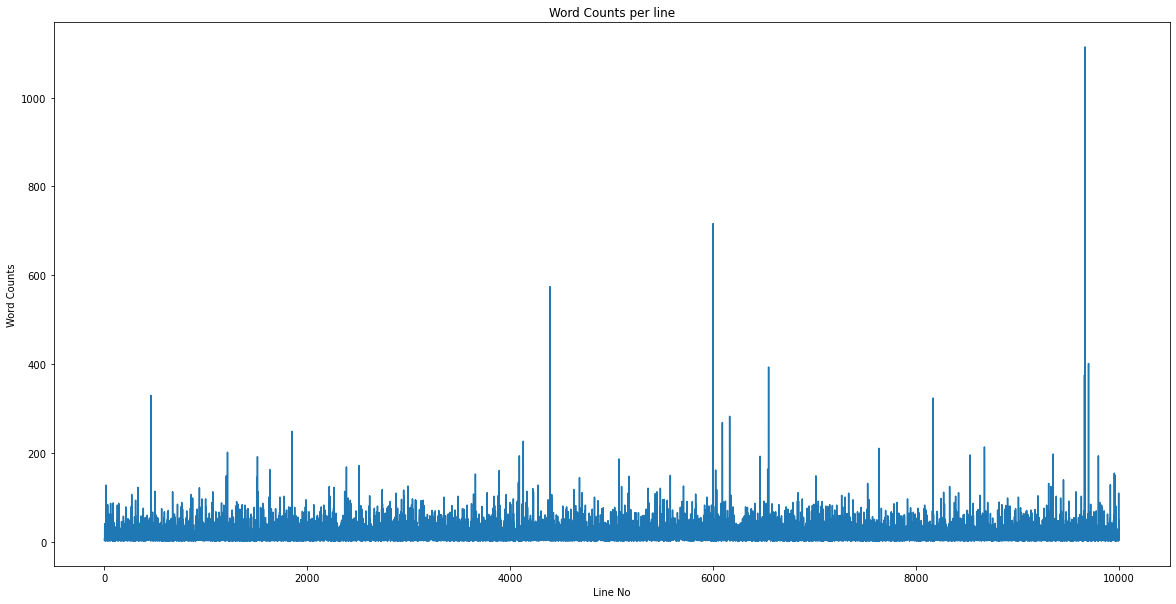

In [37]:
df["word_count"].plot(figsize=(20,10), title="Word Counts per line")
plt.xlabel("Line No")
plt.ylabel("Word Counts")
plt.show()

In [38]:
df['char_count'] = df["lemma"].apply(lambda x: len(x))

In [39]:
df.head()

,lemma,word_count,char_count
0,"['given', 'heart', 'away', 'sordid', 'boon']",5,44
1,"['start', 'side']",2,17
2,"['sugar', 'sweet']",2,18
3,"['asian', 'community', 'need', 'next', 'thing', 'know', 'asian', 'kid', 'following', 'around', 'know', 'shit', 'boy', 'wanted', 'inside', 'especially', 'two', 'particular', 'thought', 'wonderful', 'sickened', 'even', 'wonderful', 'reminds', 'quote', 'wwii', 'era', 'forget', 'go', 'say', 'something', 'like', 'hero', 'everyone', 'around', 'acting', 'badly', 'someone', 'humanitarian', 'award']",40,393
4,"['nicholas', 'brain', 'run', 'excellent', 'processing', 'data', 'concrete', 'fact', 'work', 'best', 'thing', 'quantify', 'run', 'almost', 'insurmountable', 'challenge', 'trying', 'rationalize', 'existence', 'exceptional', 'infant', 'daughter', 'represents', 'without', 'sense', 'humor', 'loving', 'forced', 'radically', 'confront', 'limitation']",31,345


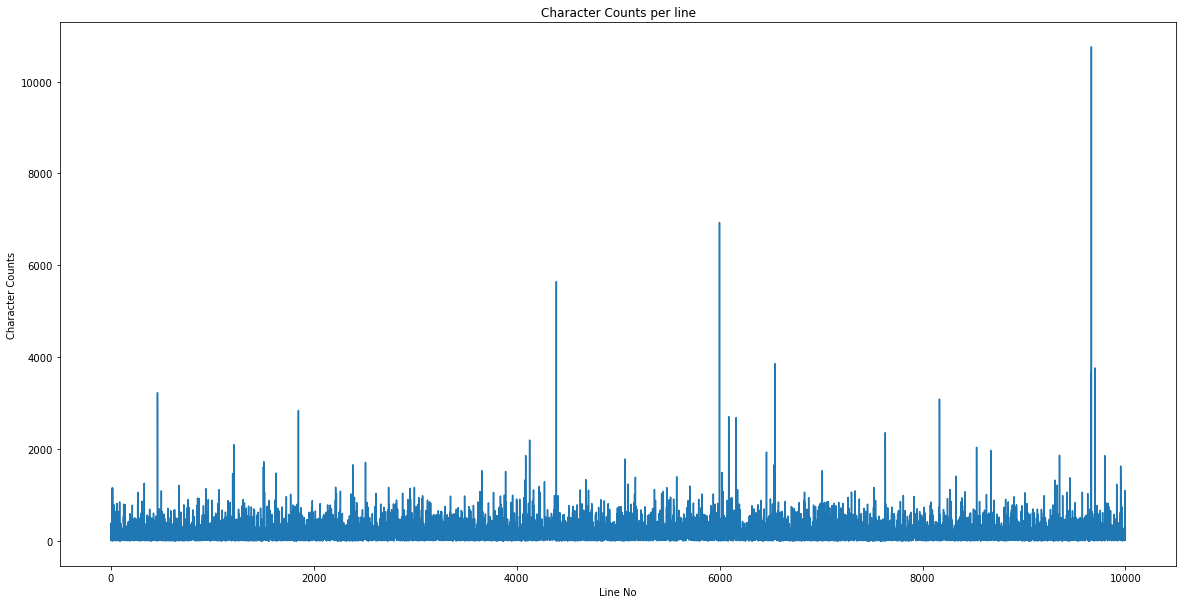

In [40]:
df["char_count"].plot(figsize=(20,10), title="Character Counts per line")
plt.xlabel("Line No")
plt.ylabel("Character Counts")
plt.show()

In [41]:
df.describe()

,word_count,char_count
count,10000.00000,10000.000000
mean,20.95150,204.902500
std,27.34818,268.578504
min,1.00000,2.000000
25%,4.00000,42.000000
50%,14.00000,134.000000
75%,29.00000,289.000000
max,1114.00000,10753.000000


### Combine words in a list

In [42]:
df["lemma"]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ['given', 'heart', 'away', 'sordid', 

In [43]:
L2 = df.lemma.apply(literal_eval).sum()
L2

['given',
 'heart',
 'away',
 'sordid',
 'boon',
 'start',
 'side',
 'sugar',
 'sweet',
 'asian',
 'community',
 'need',
 'next',
 'thing',
 'know',
 'asian',
 'kid',
 'following',
 'around',
 'know',
 'shit',
 'boy',
 'wanted',
 'inside',
 'especially',
 'two',
 'particular',
 'thought',
 'wonderful',
 'sickened',
 'even',
 'wonderful',
 'reminds',
 'quote',
 'wwii',
 'era',
 'forget',
 'go',
 'say',
 'something',
 'like',
 'hero',
 'everyone',
 'around',
 'acting',
 'badly',
 'someone',
 'humanitarian',
 'award',
 'nicholas',
 'brain',
 'run',
 'excellent',
 'processing',
 'data',
 'concrete',
 'fact',
 'work',
 'best',
 'thing',
 'quantify',
 'run',
 'almost',
 'insurmountable',
 'challenge',
 'trying',
 'rationalize',
 'existence',
 'exceptional',
 'infant',
 'daughter',
 'represents',
 'without',
 'sense',
 'humor',
 'loving',
 'forced',
 'radically',
 'confront',
 'limitation',
 'speech',
 'economic',
 'inequality',
 'reelection',
 'game',
 'dinner',
 'taking',
 'picture',
 'race

In [44]:
print(L2)

['given', 'heart', 'away', 'sordid', 'boon', 'start', 'side', 'sugar', 'sweet', 'asian', 'community', 'need', 'next', 'thing', 'know', 'asian', 'kid', 'following', 'around', 'know', 'shit', 'boy', 'wanted', 'inside', 'especially', 'two', 'particular', 'thought', 'wonderful', 'sickened', 'even', 'wonderful', 'reminds', 'quote', 'wwii', 'era', 'forget', 'go', 'say', 'something', 'like', 'hero', 'everyone', 'around', 'acting', 'badly', 'someone', 'humanitarian', 'award', 'nicholas', 'brain', 'run', 'excellent', 'processing', 'data', 'concrete', 'fact', 'work', 'best', 'thing', 'quantify', 'run', 'almost', 'insurmountable', 'challenge', 'trying', 'rationalize', 'existence', 'exceptional', 'infant', 'daughter', 'represents', 'without', 'sense', 'humor', 'loving', 'forced', 'radically', 'confront', 'limitation', 'speech', 'economic', 'inequality', 'reelection', 'game', 'dinner', 'taking', 'picture', 'race', 'outfit', 'sure', 'see', 'wore', 'sunday', 'wash', 'right', 'post', 'pic', 'next', 'd

In [45]:
len(L2)

209451

In [46]:
allwords = ' '.join(L2)

In [47]:
len(allwords)

1420543

In [48]:
print(allwords)

given heart away sordid boon start side sugar sweet asian community need next thing know asian kid following around know shit boy wanted inside especially two particular thought wonderful sickened even wonderful reminds quote wwii era forget go say something like hero everyone around acting badly someone humanitarian award nicholas brain run excellent processing data concrete fact work best thing quantify run almost insurmountable challenge trying rationalize existence exceptional infant daughter represents without sense humor loving forced radically confront limitation speech economic inequality reelection game dinner taking picture race outfit sure see wore sunday wash right post pic next day heard loud clear family witness exclusion apprehensive pusuited grandfather decided escape germany heading britain must never happen andy say tell worry party europe seem get popular strong humble steinberg belief light new assessment israeli attack back burner thanks everyone helped made art do

### WordCloud

In [49]:
mostcommon = FreqDist(L2).most_common(20)

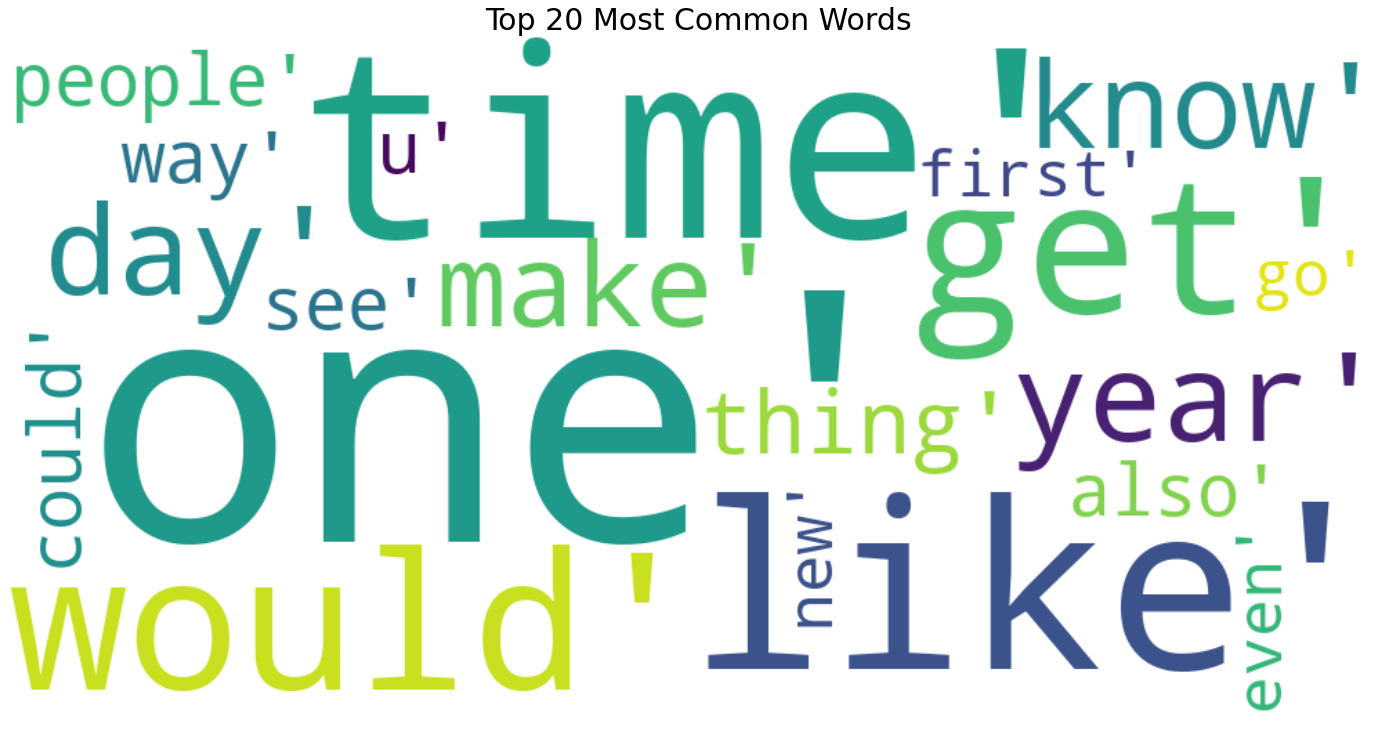

In [50]:
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 20 Most Common Words', fontsize=30)
plt.tight_layout(pad=0)
plt.show()

### Save as Textfile

In [51]:
textfile = open('textfile.txt','w', encoding="utf-8")

In [52]:
textfile.write(allwords)

1420543

In [53]:
textfile.close()

***

#### Coded and submitted by Dennis Lam 2021